In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import brainiak
import nilearn as nl
from nilearn import image, plotting, input_data
from glob import glob as glob

# load results df

In [9]:
results_file = 'decodeState_trainView_testRecall-split_by_schema-N36.csv'
fpath = 'data/analyses/' + results_file
results = pd.read_csv(fpath,index_col=0)

In [12]:
results

,layer,num_test_samples,roi,schema_test,schema_train,score,sub_num
0,2,20,SnPM_filtered_FDR,N,N,0.350000,3
1,3,5,SnPM_filtered_FDR,N,N,0.000000,3
2,4,22,SnPM_filtered_FDR,N,N,0.590909,3
3,2,40,SnPM_filtered_FDR,S,N,0.575000,3
4,3,29,SnPM_filtered_FDR,S,N,0.344828,3
...,...,...,...,...,...,...,...
2191,3,4,rhippocampusAAL,N,S,0.750000,44
2192,4,12,rhippocampusAAL,N,S,0.083333,44
2193,2,13,rhippocampusAAL,S,S,0.461538,44
2194,3,4,rhippocampusAAL,S,S,0.500000,44


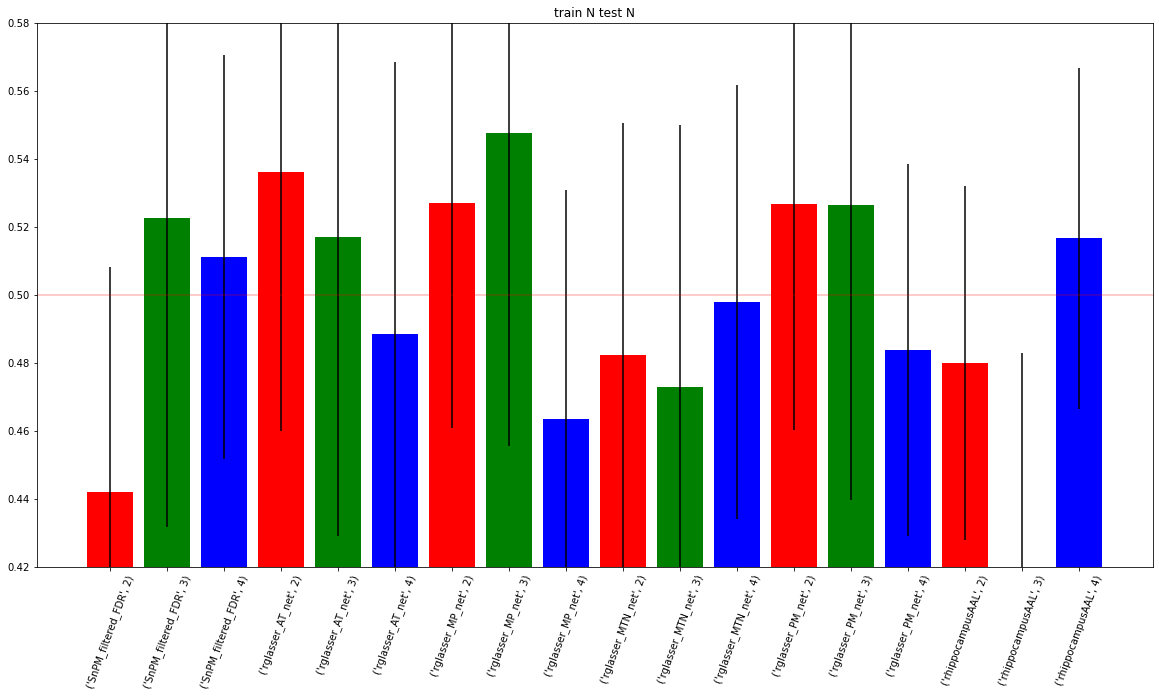

In [21]:
plt.figure(figsize=(20,10))
sch_train = 'N'
sch_test = 'N'
train_bool = (results.schema_train == sch_train)
test_bool = (results.schema_test == sch_test)
results_group = results[train_bool & test_bool].groupby(['roi','layer'])
M = results_group.score.mean()
N = len(results.sub_num.unique())
S = 2*(results_group.score.std()/np.sqrt(N))
ax = plt.gca()
cL= np.tile(['r','g','b'],6)
ax.bar(range(len(M)),M,yerr=S,color=cL)
ax.set_ylim(0.42,.58)
ax.axhline(0.5,c='r',lw=.4)
labels = results_group.mean().index.values
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=70)
ax.set_title('train %s test %s'%(sch_train,sch_test))
plt.savefig('figures/'+results_file.split('.')[0]+'-train%stest%s'%(sch_train,sch_test))


# without motion regress 
- broken

In [6]:
M = results.score.mean()
N = results.num_test_samples.sum()
S = results.score.std()/np.sqrt(N)

print('group M=%.2f, S=%.4f'%(M,S))

group M=0.50, S=0.0001


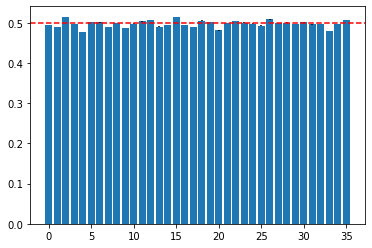

In [7]:
subM = results.groupby('sub_num').mean().score
subN = results.groupby('sub_num').sum().num_test_samples
subS = results.groupby('sub_num').std().score/np.sqrt(subN)

plt.bar(range(len(subM)),subM,yerr=subS)
plt.axhline(0.5,c='r',ls='--')

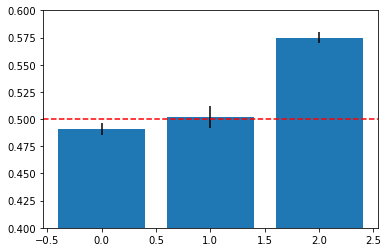

In [37]:
layerM = results.groupby('layer').mean().score
layerN = results.groupby('layer').sum().num_test_samples
layerS = results.groupby('layer').std().score/np.sqrt(layerN)

plt.bar(range(len(layerM)),layerM,yerr=layerS)
plt.ylim(0.4,0.6)
plt.axhline(0.5,c='r',ls='--')

In [56]:
""" 
subjects not in analysis 
"""
missing_subs_L = []
for i in np.arange(45):
  if i not in results.sub_num.unique():
    missing_subs_L.append(i)
missing_subs_L

[0, 1, 2, 11, 15, 16, 20, 21, 37, 39]